# **Commenting Format:**

[PEP 8 – Style Guide for Python Code](https://peps.python.org/pep-0008/#comments)

Miryam Strautkalns

`CMPE-255. Spring 2024`

# Pleasantville

Pleasantville. The village where life is... pleasant.

As members of the city's planning department, we are responsible for the timely distribution of flyers for the annual children festival to all houses. Lately the population has exploded, driven by a large influx of newcomers, attracted by the pleasant life. This is forcing the planning department to move into the XXI Century by adopting modern techniques for Data Mining and, in particular, clustering, in hopes that these cutting edge tools can ease the tasks the department is entrusted with.

As we prepare to enlist personnel for handing off those flyers, we start by gathering some basic information about the city, as shown in the following table.

| Item | Value | Notes |
| ---- | ---- | ---- |
| Housing Units |	16251 | The total number housing units in Pleasantville |
| City map |	12.5 miles x 10.7 miles |	The dimensions of Pleasantville |
| Units per day | 800 | Maximum number of housing units a flyer handler can visit in one day, assuming the handler is in peak physical shape |


And we decide on a few assumptions:

| Assumptions |
| ---- |
| The city of Pleasantville is a rectangle of width = 12.5 miles and height = 10.7 miles |
| Housing units in Pleasantville are randomly distributed |
| The weight and walking speed of handlers is an important factor in their efficiency in delivering flyers |

In [ ]:
# Libraries. Add as needed
import numpy as np
import random
from math import sqrt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import itertools
import random
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

In [ ]:
# DO NOT MODIFY
HOUSING_UNITS = 16251
MAX_UNITS_PER_DAY = 800
# Max distance in square miles
MAX_DISTANCE_PER_HANDLER = 1

# Size in miles
MAP_WIDTH = 12.5
MAP_HEIGHT = 10.7

# Utility Functions

The following utility functions can be used (or not) during the resolution of the homework. They are provided here for convenience.

In [ ]:
# DO NOT MODIFY
def create_housing_map(no_locations=HOUSING_UNITS, map_width=MAP_WIDTH, map_height=MAP_HEIGHT):
  '''Function to randomly create locations on a map'''

  random.seed(42)

  true_false = (True, False)
  min_income = 32000
  max_income = 350000

  unit_loc_x = [random.random()*map_width for i in range(no_locations)]
  unit_loc_y = [random.random()*map_height for i in range(no_locations)]
  unit_small_children = random.choices(true_false, weights = [35, 65], k=no_locations)
  unit_income = [min_income + random.random()*max_income for i in range(no_locations)]
  unit_occupancy  = random.choices((1,2,3,4,5), k=no_locations)


  unit = {
    "Loc X"  : unit_loc_x,
    "Loc Y" : unit_loc_y,
    "Small Children" : unit_small_children,
    "Income" : unit_income,
    "Occupancy" : unit_occupancy
  }

  df = pd.DataFrame.from_dict(unit)

  return df


def plot_clusters(clusters, centroids=None):
  '''Plot clusters and centroids in different colors

     clusters: Dictionary of lists. Each key is the ID of a cluster.
     centroids: List of locations'''
  colors = itertools.cycle(["green", "blue", "magenta", "yellow", "white",
                            "black", "grey", "violet", "pink", "turquoise",
                            "cyan", "purple", "orange", "olive", "brown"])
  plt.xlabel('X (miles)')
  plt.ylabel('Y (miles)')
  plt.title('Locations in a rectangular US map')
  for key in range(len(clusters.keys())):
    if len(clusters[key]) == 0:
      continue
    plt.scatter(*zip(*clusters[key]), color=next(colors), marker=".")

  if centroids != None:
    plt.scatter(*zip(*centroids), color="red", marker='^')


def plot_locations(locations, color="blue"):
  plt.xlabel('X (miles)')
  plt.ylabel('Y (miles)')
  plt.title('Locations in a rectangular US map')
  plt.scatter(*zip(*locations), color=color, marker='D')


In [ ]:
# EXAMPLE. Create a housing map with locations, occupancy, and information about small children
census = create_housing_map(no_locations=HOUSING_UNITS)
census

,Loc X,Loc Y,Small Children,Income,Occupancy
0,7.992835,2.768003,False,193874.701181,1
1,0.312634,5.759170,False,351623.015565,5
2,3.437866,8.057187,True,97669.350611,1
3,2.790134,6.746210,False,258196.991719,3
4,9.205890,5.849737,False,143717.387463,1
...,...,...,...,...,...
16246,6.052995,7.509009,False,80784.134304,2
16247,11.394426,5.713141,True,176760.617762,4
16248,9.344023,9.105898,True,347573.372816,3
16249,9.654998,3.525119,True,361997.572190,2


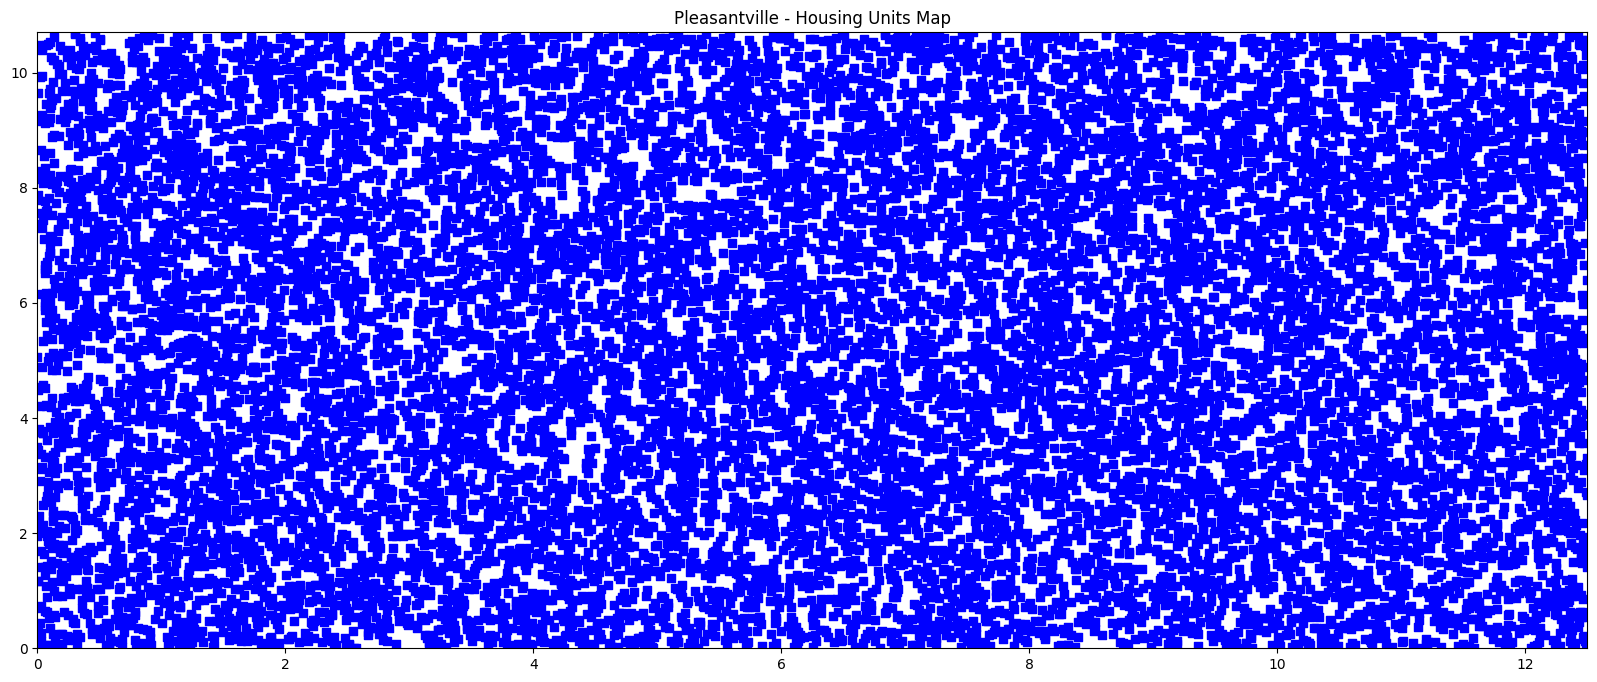

In [ ]:
# PLOT map of Pleasantville and its housing units
fig = plt.figure(1, (20, 8))
ax1 = fig.add_subplot(1, 1, 1)

random_map = census[['Loc X', 'Loc Y']].values.tolist()

ax1.scatter(*zip(*random_map), color='blue', marker="s")
ax1.set_ylim(0, MAP_HEIGHT)
ax1.set_xlim(0, MAP_WIDTH)
ax1.set_title("Pleasantville - Housing Units Map")
plt.show()

# 1. Data Evaluation, Clean-up, and Display


## 1.1 Data Statistics - Income

This section examines the household income in the city.

### 1.1.1 Plot a histogram of household income into 4 bins.

Text(0, 0.5, 'Number of Households')

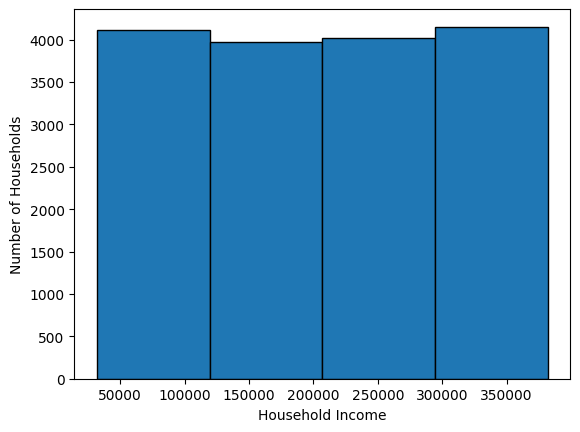

In [ ]:
income_col = census['Income']   # DataFrame column for census income
(n, bins, patches) = plt.hist(income_col, bins=4, edgecolor='black')
plt.xlabel('Household Income')
plt.ylabel('Number of Households')


### 1.1.2 Income average

Calculate the maximum, minimum, average and median income in Pleasantville.

In [ ]:
def calc_max(df):
  """return the maximum value(s), to 2 float places ($)

  input is a DataFrame column"""

  return df.max()

def calc_min(df):
  """return the minimum value(s), to 2 float places ($)

  input is a DataFrame column"""

  return df.min()

def calc_ave(df):
  """return the mean/average value(s), to 2 float places ($)

  input is a DataFrame column"""

  return df.mean()

def calc_med(df):
  """return the maximum value(s), to 2 float places ($)

  input is a DataFrame column"""

  return df.median()


print('The maximum income is: $', calc_max(income_col).round(2))
print('The minimum income is: $', calc_min(income_col).round(2))
print('The average income is: $', calc_ave(income_col).round(2))
print('The median income is: $', calc_med(income_col).round(2))



The maximum income is: $ 381999.25
The minimum income is: $ 32018.69
The average income is: $ 207626.75
The median income is: $ 207979.05


### 1.1.3 Income distribution

Plot a map of housing in Pleasanville coloring each house based on their income bin. As we created 4 bins, there should be 4 colors in the map.

[ 32018.69400512 119513.83184133 207008.96967755 294504.10751376
 381999.24534997]


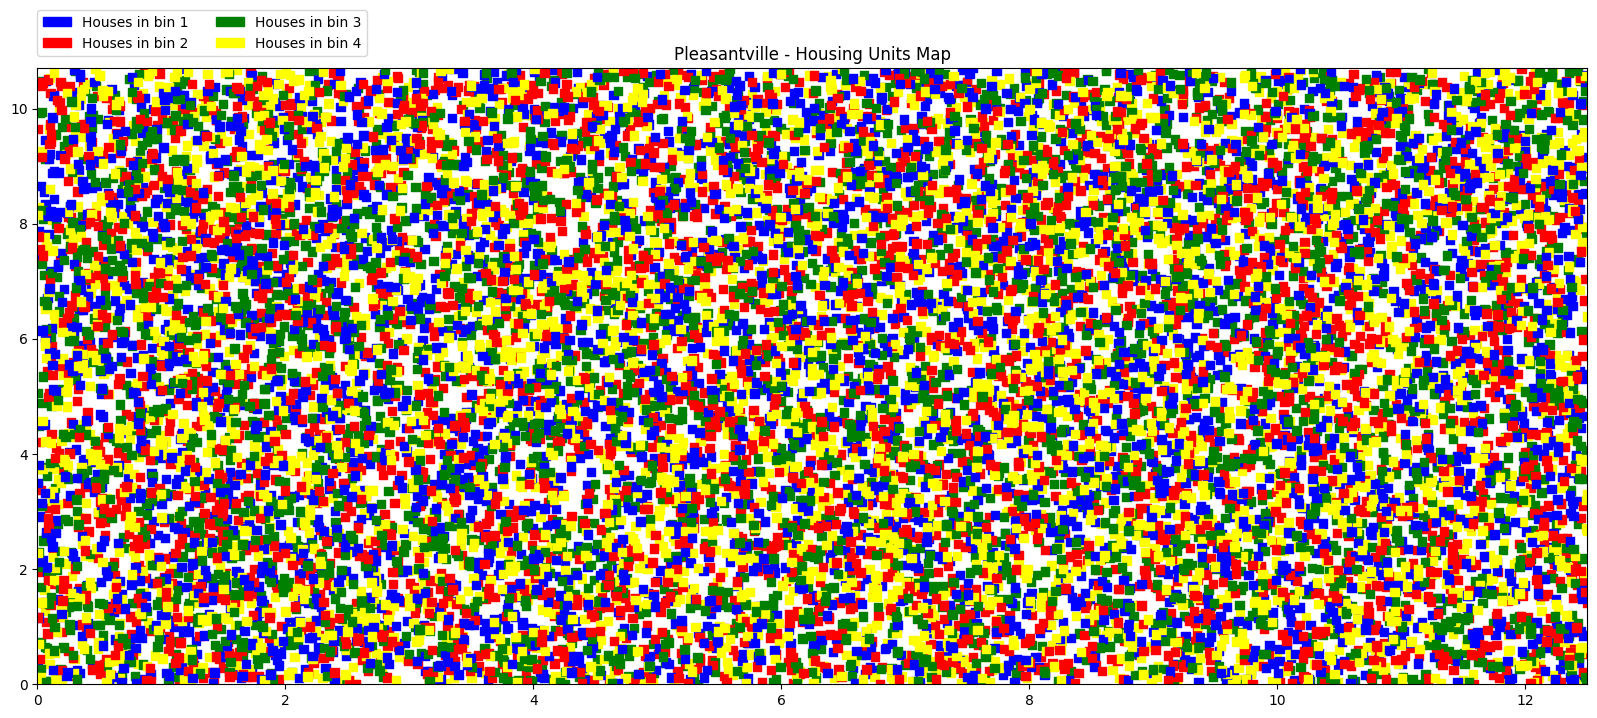

In [ ]:

"""adds color information

using bin data, assigns a color for each house
"""
colors = []
for i in census.index:
  """bin colors, [blue, red, green, yellow]"""
  if income_col.iloc[i] >= bins[0] and income_col.iloc[i] < bins[1]:
    colors.append('blue')
  elif income_col.iloc[i] >= bins[1] and income_col.iloc[i] < bins[2]:
    colors.append('red')
  elif income_col.iloc[i] >= bins[2] and income_col.iloc[i] < bins[3]:
    colors.append('green')
  elif income_col.iloc[i] >= bins[3] and income_col.iloc[i] <= bins[4]:
    colors.append('yellow')

census_plots = pd.DataFrame(data=colors, columns=['Bin Color'])


# PLOT map of Pleasantville and its housing units (modified code from previous map)
fig = plt.figure(1, (20, 8))
ax1 = fig.add_subplot(1, 1, 1)

random_map = census[['Loc X', 'Loc Y']].values.tolist()

ax1.scatter(*zip(*random_map), color=census_plots['Bin Color'], marker="s")
ax1.set_ylim(0, MAP_HEIGHT)
ax1.set_xlim(0, MAP_WIDTH)
ax1.set_title("Pleasantville - Housing Units Map")
blue_houses = mpatches.Patch(color='blue', label='Houses in bin 1')
red_houses = mpatches.Patch(color='red', label='Houses in bin 2')
green_houses = mpatches.Patch(color='green', label='Houses in bin 3')
yellow_houses = mpatches.Patch(color='yellow', label='Houses in bin 4')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, borderaxespad=0., handles=[blue_houses, red_houses, green_houses, yellow_houses])

plt.show()

### 1.1.4 Income-based neighborhoods

By examining the income plot in the previous section, how would you describe the neighboorhoods in Pleasanville? Do we find neighboorhoods with similar income levels? or, instead, the distribution of income is similar throughout the city?

The histogram shows a uniform distribution of household incomes. When looking at the color coded map, all throughout each section you can see a fairly even spread of all four bins of income represented. That being said, if you look closely there are small groupings of each color, while every area has each bin represented it is clear that a if you see a color it appears to be in small groups of 3-5 homes. This isn't a large enough concentration of a single bin to claim that there are neighborhoods of similar incomes.



Thus, no there are no income based neighborhoods.

## 1.2 - Data Statistics - Children

In this section we want to gain some insight about the statistics of Small Children in the city.

### 1.2.1 Percentage of Small Children

Plot a Pie Chart of the number of households with and without small children.
Calculate the percentage of house units with small children

([<matplotlib.patches.Wedge at 0x79658e3ba500>,
 [Text(-0.5001188637633169, 0.9797352306149294, 'No Small Children'),
  Text(0.5001188637633173, -0.9797352306149293, 'Have Small Children')],
 [Text(-0.27279210750726374, 0.5344010348808705, '65.0%\n(10567 households)'),
  Text(0.2727921075072639, -0.5344010348808704, '35.0%\n(5684 households)')])

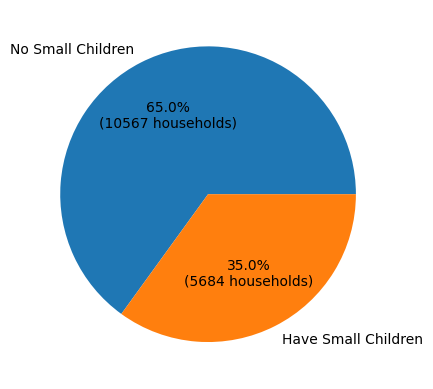

In [ ]:
# pie chart - number of households with and without children

def autopct_format(values):
  """returns text for labeling

    includes the total number of households with percentages"""

  def format_text(pct):
    # formats text
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{:.1f}%\n({v:d} households)'.format(pct, v=val)
  return format_text

sizes = census['Small Children'].value_counts()
labels = 'No Small Children', 'Have Small Children'
plt.pie(sizes, labels = labels, autopct=autopct_format(sizes))



## 1.3 Data Clean-up

By inspecting the data, can you identify any inconsistency?

Delete all entries in the census that have inconsistent data.


There are some census entries that say they have small children, but the occupancy is one person. These entries don't make sense and will be removed.

In [ ]:
# removing households that have children & occupancy = 1
children = census.where(census['Small Children'] == True)
occ_mistakes = children.where(children['Occupancy'] == 1).dropna()
census = census.drop(occ_mistakes.index).reset_index()
census_plots = census_plots.drop(occ_mistakes.index).reset_index(drop=True)


# 2. Basic Clustering


Credit for random color generator:

https://www.askpython.com/python/examples/generate-random-colors

In [ ]:
def euclid(centroid, point):
  """ returns the euclidean distance between the two coordinates

  centroid: a list of two float values representing the coordinates of a cluster's centroid
  point: a list of two float values representing the coordinates of a cluster's object"""

  cent_x = centroid[0]
  cent_y = centroid[1]
  point_x = point[0]
  point_y = point[1]
  diff_x = abs(cent_x - point_x)
  diff_y = abs(cent_y - point_y)
  return sqrt(diff_x**2 + diff_y**2)


def rcg():
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)
  return (r, g, b)


## 2.1 Housing units allocation per handler

Assume the city has only 20 handlers available to deliver the flyers to all housing units.

Select a clustering scheme, and create a cluster map that show the housing units every handler owns. Plot this map with a different color per cluster.

I have selected K Means. I chose it because it was one of the clustering techniques in sckit learn where the user can select the number of clusters groups are partitioned off into. It also made sense for the context of the problem.

In [ ]:
""" K means set to partition to 20 clusters """


X = census[['Loc X', 'Loc Y']].to_numpy()

kmeans = KMeans(n_clusters=20, random_state=0, n_init="auto").fit(X)
census_plots['Cluster'] = kmeans.labels_
cluster_colors = {0: 'springgreen', 1: 'mediumpurple', 2: 'lightblue', 3: 'brown', 4: 'orange', 5: 'slateblue', 6: 'orchid', 7: 'darkolivegreen', 8: 'coral', 9: 'darkgoldenrod', 10: 'cadetblue', 11: 'plum', 12: 'mediumturquoise', 13: 'deeppink', 14: 'peru', 15: 'darkseagreen', 16: 'steelblue', 17: 'palevioletred', 18: 'crimson', 19: 'indianred'}

centroids = kmeans.cluster_centers_
cent_dict = {}
count = 0
for point in centroids:
  cent_dict[count] = point
  count = count + 1

color_arr = []
cent_arr_x = []
cent_arr_y = []
for index in census_plots['Cluster'].index:
  color_arr.append(cluster_colors[census_plots['Cluster'].iloc[index]])
  cent_arr_x.append(cent_dict[census_plots['Cluster'].iloc[index]][0])
  cent_arr_y.append(cent_dict[census_plots['Cluster'].iloc[index]][1])

census_plots['Cluster Color'] = color_arr
census_plots['Centroid X'] = cent_arr_x
census_plots['Centroid Y'] = cent_arr_y




,Bin Color,Cluster,Cluster Color,Centroid X,Centroid Y
0,red,4,orange,9.051427,3.782625
1,yellow,19,indianred,1.460858,5.397579
2,green,2,lightblue,3.864422,6.783224
3,red,7,darkolivegreen,8.630172,6.710583
4,green,0,springgreen,8.971243,9.370171
...,...,...,...,...,...
15061,blue,13,deeppink,6.075180,6.651866
15062,red,3,brown,11.186943,6.124206
15063,yellow,0,springgreen,8.971243,9.370171
15064,yellow,4,orange,9.051427,3.782625


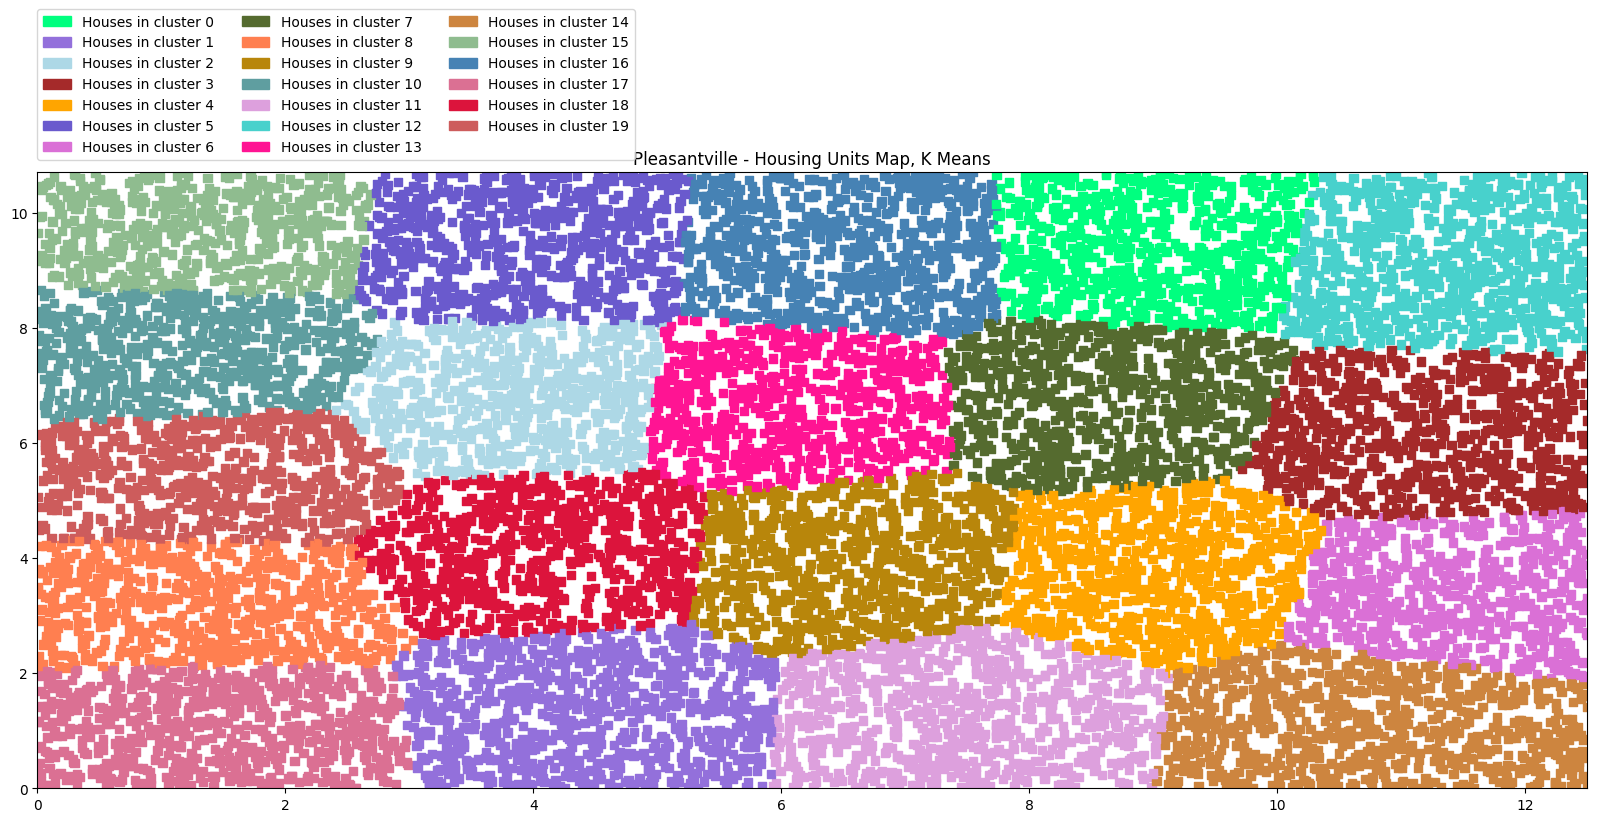

In [ ]:
# PLOT map of Pleasantville, its homes are clustered using k means (modified code from previous map)
fig = plt.figure(1, (20, 8))
ax1 = fig.add_subplot(1, 1, 1)

random_map = census[['Loc X', 'Loc Y']].values.tolist()

ax1.scatter(*zip(*random_map), color=census_plots['Cluster Color'], marker="s")
ax1.set_ylim(0, MAP_HEIGHT)
ax1.set_xlim(0, MAP_WIDTH)
ax1.set_title("Pleasantville - Housing Units Map, K Means")

leg_handles = []
for num_val in cluster_colors:
  cluster_text = 'Houses in cluster ' + str(num_val)
  leg_handles.append(mpatches.Patch(color=cluster_colors[num_val], label=cluster_text))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, borderaxespad=0., handles=leg_handles)

plt.show()



## 2.2 Maximum travel distance

Assume now that the absolute maximum distance a handler can travel is 1.0 mile from the center of his/her allocated cluster of housing units.

Calculate the number of houses that will be left without service from a handler.

Plot the same clustering map as in 2.1, but mark all housing units left without service with an asterisk.


In [ ]:
""" assigns an '*' for houses outside 1 mile of the centroid and the color black """

X_plots = census_plots[['Centroid X', 'Centroid Y']].to_numpy()
mark_arr = []
dist_color = census_plots['Cluster Color'].to_numpy()

for num in range(len(X_plots)):
  distance = euclid(X[num], X_plots[num])
  if distance > 1:
    mark_arr.append('*')
    dist_color[num] = 'black'
  else:
    mark_arr.append('s')

census_plots['Distance Mark'] = mark_arr
census_plots['Distance Color'] = dist_color


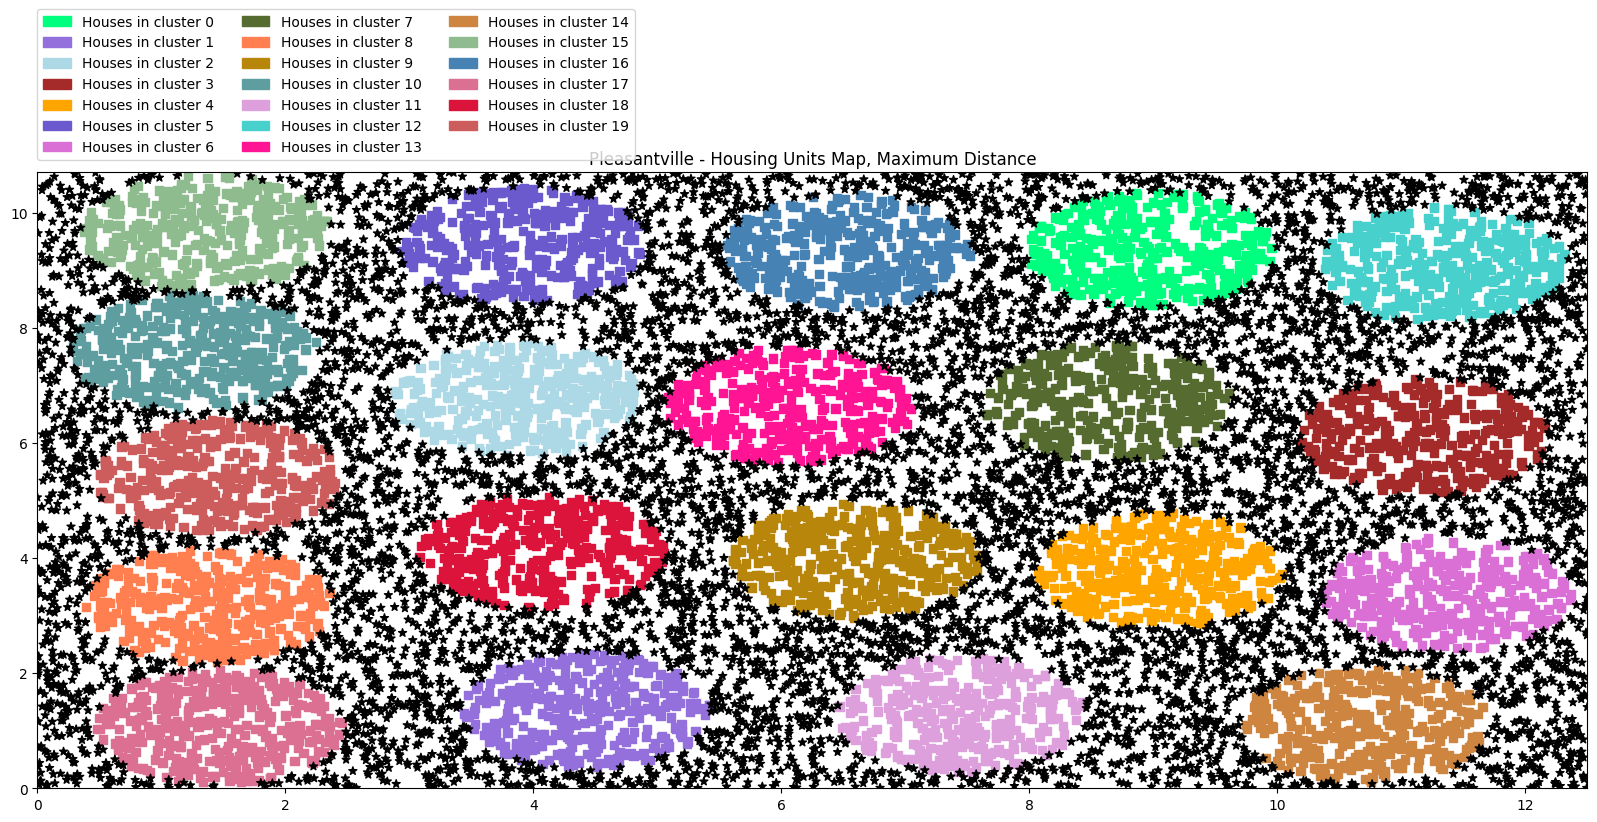

In [ ]:
""" created two groups for scatter plots, handler accessible and outliers """

far_houses = census_plots.where(census_plots['Distance Mark'] == '*').dropna()
close_houses = census_plots.where(census_plots['Distance Mark'] == 's').dropna()
close_points = census[['Loc X', 'Loc Y']].drop(far_houses.index).values.tolist()
far_points = census[['Loc X', 'Loc Y']].drop(close_houses.index).values.tolist()


# PLOT map of Pleasantville, its homes are clustered using k means (modified code from previous map)

fig = plt.figure(1, (20, 8))
ax1 = fig.add_subplot(1, 1, 1)

random_map = census[['Loc X', 'Loc Y']].values.tolist()

ax1.scatter(*zip(*close_points), color=close_houses['Distance Color'], marker='s')
ax1.scatter(*zip(*far_points), color=far_houses['Distance Color'], marker='*')
ax1.set_ylim(0, MAP_HEIGHT)
ax1.set_xlim(0, MAP_WIDTH)
ax1.set_title("Pleasantville - Housing Units Map, Maximum Distance")

leg_handles = []
for num_val in cluster_colors:
  cluster_text = 'Houses in cluster ' + str(num_val)
  leg_handles.append(mpatches.Patch(color=cluster_colors[num_val], label=cluster_text))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=3, borderaxespad=0., handles=leg_handles)

plt.show()

## 2.3 Number of handlers, to cover the entire city

The city finally got a budget to hire additional handlers. The Major needs to know how many are needed to be able to deliver flyers to all housing units.

Select a strategy, involving clustering, to calculate the number of handlers needed to cover the entire city, with the assumption that the absolute maximum distance a handler can travel from the center of his/her cluster is 1 mile.

In order to minimize the total number of required handlers, the City allows some flexibility in the number of housing units that can be left without flyer. Assume this flexibility is up-to 2% of the houses can be left without a handler.

In [ ]:
def househandlers(clusters):
  """ returns the percentage of homes not reachable by handlers

  clusters: int, number of clusters to partition"""

  X = census[['Loc X', 'Loc Y']].to_numpy()
  too_far = 0
  total_homes = len(X)

  kmeans = KMeans(n_clusters=clusters, random_state=0, n_init="auto").fit(X)
  cluster_label = kmeans.labels_
  centroids = kmeans.cluster_centers_
  for num in range(len(X)):
    if euclid(centroids[cluster_label[num]], X[num]) > 1:
      too_far = too_far + 1
  return too_far / total_homes


def findhandlers(perc_limit):
  """ returns a statement explaining how many handlers are needed and percent of outlier homes

  perc_limit: float, the percent limit of homes that can be inaccessible"""

  cluster_num = 2
  current_perc = 1
  while current_perc > perc_limit:
    current_perc = househandlers(cluster_num)
    if current_perc > perc_limit:
      cluster_num = cluster_num + 1
  print('Considering a ', perc_limit*100, '% household reach limit. ', cluster_num, 'handlers are needed,\n but', round(current_perc, 4)*100, '% of homes will be without a handler.')

findhandlers(0.02)

Considering a  2.0 % household reach limit.  55 handlers are needed,
 but 1.48 % of homes will be without a handler.


# 3. Advanced Clustering

After assessing the dismal physical fitness of the flyer handlers in the department of planning, it was decided that the previously clustering does not reflect the reality of the capabilities of the handlers, in terms of carrying the flyers and walking to all their assigned houses.

In order to reassess the clustering, a new definition of distance is introduced: The handler's "effective_distance". This distance takes into account not only the physical distance between houses, but also the weight and speed of the handler.

## 3.1. Coding "Effective Distance"

The following template defines the "effective distance". Complete the definition adding the appropriate code


Credit for random number generator code:

https://numpy.org/doc/stable/reference/random/generator.html

Re-calculate the total number of handlers needed to cover the entire city, considering:

a) Use the handler's "effective distance" instead of the regular euclidean, as measure of distance for clustering

b) Randomly generate each handler's weight and speed factor, assuming 'weight' is randomly distributed between 57 and 118 Kg, and 'speed factor' is randomly distributed between 0.6 and 1.4

c) A maximum of 2% outliers is allowed

Select a strategy, involving clustering, to calculate the number of handlers needed to cover the entire city, with the assumption that the absolute maximum distance a handler can travel from the center of his/her cluster is 1 mile. Please note that the maximum distance calculation should be done with Euclidean, not effective distance. The effective distance should be used only for clustering.

In [ ]:
def randnumber_gen(num_type):
  """ returns random number

  num_type: string, identifying whether the value is for weight or speed of handler"""

  if num_type == 'weight':
    np.random.uniform(5,10)
    return np.random.uniform(57, 118)
  elif num_type == 'speed':
    return np.random.uniform(0.6, 1.4)

def weight_factor(W):
    """ returns weight factor in terms of handler weight

    W: handlers weight in kg"""

    if W <= 72:
      return 1.0
    else:
      return 1.0 + (W-72)/W

def speed_factor(S):
    """ returns speed factor in terms of handler maximum walking speed

    S: handlers maximum walking speed"""

    return 1.0 + abs(1.0 - 0.8/S)

def effective_distance (P1, P2, W, S):
    '''Effective distance between two locations when considering the physical capabilities
      of the flyers handler that walks between them.

      P1, P2: 2-dimensional tuple of values for the location - (x, y)
      W     : Handler's weight in Kg
      S     : Handler's maximum walking speed, in m/s

      return value: (int or float) value

      The following equation determines the handler effective distance:

      D = euclidean_distance(P1, P2) * SQRT(weight_factor(W) * speed_factor(S))

      where:
        weight_factor(W) = 1.0, if weight <= 72 Kg
                          1.0 + (W-72)/W, if weight > 72 Kg

        speed_factor(S)  = 1.0 + abs(1.0 - 0.8/S)
    '''

    distance = euclid(P1, P2) * sqrt(weight_factor(W) * speed_factor(S))

    return distance


In [ ]:
def househandlers_effdist(clusters, weight, speed):
  """ returns the percentage of homes not reachable by handlers

  clusters: int, number of clusters to partition
  weight: float, handler's weight
  speed: handler's maximum speed"""

  X = census[['Loc X', 'Loc Y']].to_numpy()
  too_far = 0
  total_homes = len(X)
  kmeans = KMeans(n_clusters=clusters, random_state=0, n_init="auto").fit(X)
  cluster_label = kmeans.labels_
  centroids = kmeans.cluster_centers_

  for num in range(len(X)):
    if effective_distance(centroids[cluster_label[num]], X[num], weight, speed) > 1:
      too_far = too_far + 1
  return too_far / total_homes


def findhandlers_32(perc_limit):
  """ returns a statement explaining how many handlers are needed and percent of outlier homes

  perc_limit: float, the percent limit of homes that can be inaccessible"""

  cluster_num = 2
  current_perc = 1
  weight = randnumber_gen('weight')
  speed = randnumber_gen('speed')
  print("Handler Weight(kg): ", weight, " Handler Speed: ", speed)

  while current_perc > perc_limit:
    current_perc = househandlers_effdist(cluster_num, weight, speed)
    if current_perc > perc_limit:
      cluster_num = cluster_num + 1
  print('Considering a ', perc_limit*100, '% household reach limit. ', cluster_num, 'handlers are needed,\n but', round(current_perc, 4)*100, '% of homes will be without a handler.')

findhandlers_32(0.02)

Handler Weight:  84.50141775282847  Handler Speed:  0.6778957163082782
Considering a  2.0 % household reach limit.  72 handlers are needed,
 but 1.66 % of homes will be without a handler.


## 4. Quality of the clustering •

* a) Select and describe at least one quality measure for the clusters.

  I chose Calinski-Harabasz Index - It measures the between-cluster dispersion against within-cluster dispersion.
  
  A higher score signifies better-defined clusters.
  
  I would like to see how the number of clusters selected for handlers and their dispersals are rated. This method I think is better suited for the context of this problem because the houses are so uniformly distributed. There are no distinctive features like space between clustered data that would help an algorithm select clusters, that I can see.




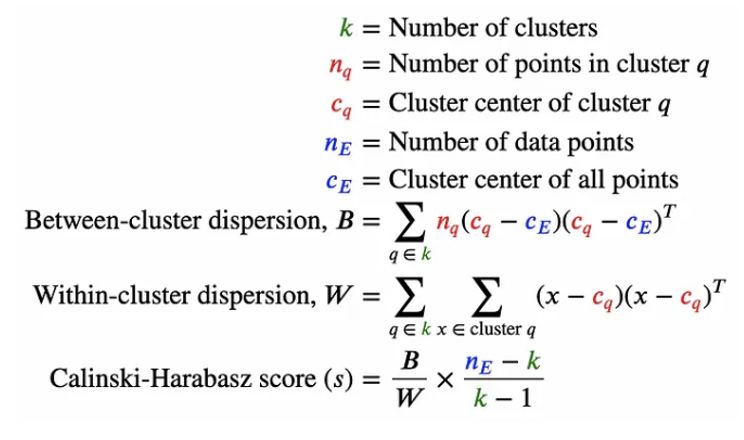

* b) Apply the quality measure to the clustered data from deliverable 3.2. Display the results.